# Kaggle 신용카드 사기 검출 (Google Drive Mount)
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : 0 (정상), 1 (사기)
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'creditCardFraud.zip' 파일을 구글드라이브에 업로드 후 진행

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar 31 15:04 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [ ]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Sep 29 00:56 drive
drwxr-xr-x 1 root root      4096 Sep 16 13:40 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [ ]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* 0 (정상) Class와 1 (사기) Class 비율

In [ ]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [ ]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split( )

* X (Input), y (Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

* With 'Stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [ ]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# I. Keras Modeling

In [ ]:
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
Model_detection = models.Sequential()

Model_detection.add(layers.Dense(10, activation = 'relu', input_shape = (29,)))
Model_detection.add(layers.Dense(8, activation = 'relu'))
Model_detection.add(layers.Dense(6, activation = 'relu'))
Model_detection.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
Model_detection.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


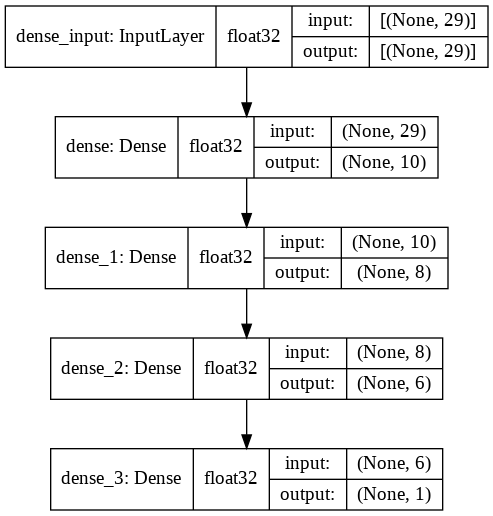

In [ ]:
from tensorflow.keras import utils

utils.plot_model(Model_detection,
                 show_shapes = True,
                 show_dtype = True)

In [ ]:
Model_detection.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = [tensorflow.keras.metrics.Recall()])

In [ ]:
History_detection = Model_detection.fit(X_train, y_train,
                                         epochs = 100,
                                         batch_size = 2000,
                                         validation_data = (X_test, y_test))

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0014 - recall_11: 0.8721 - val_loss: 0.0055 - val_recall_11: 0.8311
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0013 - recall_11: 0.8750 - val_loss: 0.0055 - val_recall_11: 0.8243
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0013 - recall_11: 0.8663 - val_loss: 0.0049 - val_recall_11: 0.8243
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0013 - recall_11: 0.8779 - val_loss: 0.0050 - val_recall_11: 0.8176
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0014 - recall_11: 0.8663 - val_loss: 0.0050 - val_recall_11: 0.8176
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0013 - recall_11: 0.8750 - val_loss: 0.0046 - val_recall_11: 0.8041
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0013 - recall_11: 0.8779 - val_loss: 0.0053 - val_rec

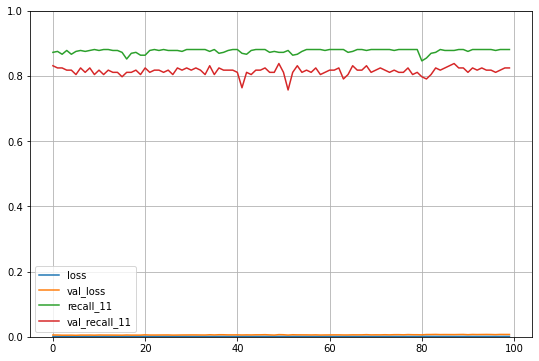

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.ylim(0, 1)
plt.plot(History_detection.history['loss'])
plt.plot(History_detection.history['val_loss'])
plt.plot(History_detection.history['recall_11'])
plt.plot(History_detection.history['val_recall_11'])
plt.legend(['loss', 'val_loss', 'recall_11', 'val_recall_11'])
plt.grid()
plt.show()

In [ ]:
loss, recall = Model_detection.evaluate(X_test, y_test)

print('Loss = {}'.format(loss))
print('Recall = {}'.format(recall))

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0072 - recall_11: 0.8243
Loss = 0.007179539650678635
Recall = 0.8243243098258972


In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

Model_detection.predict(X_test)

array([[0.00000006],
       [0.00056997],
       [0.00000038],
       ...,
       [0.        ],
       [0.0000004 ],
       [0.00000001]], dtype=float32)

In [ ]:
y_hat = np.argmax(Model_detection.predict(X_test), axis=1)

y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.shape

(85443,)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

TypeError: ignored

# 
# 
# 
# The End
# 
# 
# 